Importing packages and loading in data.
For this assignment, I decided to go with the "One Piece" interaction data. In this dataset, each interaction between characters is documented and categorized as either:
- Preception
- Communication
- Confrontation
- Cooperation
- Emotional
- Indirect
- Physical
- Other

With these categorizations, each episode shows the types of interactions and also does well to illistrate who are the main characters of each episode.

In [1]:
from pyvis.network import Network

# Create a function to get the data
def get_op_data():
    # importing json & requests to get the data
    import json
    import requests

    # Set up the URL
    url = 'https://raw.githubusercontent.com/jonaszeu/one-piece-interaction-data/refs/heads/main/one_piece_interactions_visualization_1-1085.json'

    # Get a response object
    response = requests.get(url)
    response.raise_for_status()

    data = response.json()

    print('Retrieved OP data.')
    return data

We'll now get the data using the funciton created in the cell above

In [2]:
op_data = get_op_data()

Retrieved OP data.


We'll now also look at the "keys" for the dictionary and see a few entries to get a feel for the data.

In [3]:
op_data.keys()

dict_keys(['nodes', 'links'])

In [4]:
op_data.get('nodes')[:5]

[{'id': 'aramaki'},
 {'id': 'gancho'},
 {'id': 'h2s'},
 {'id': 'dacquoise'},
 {'id': 'hogback'}]

In [5]:
op_data.get('links')[:3]

[{'source': 'luffy',
  'target': 'sailors on a cruise ship',
  'interaction': 'Perception',
  'episode': 1,
  'saga': 'East Blue Saga',
  'arc': 'Romance Dawn',
  'filler': False},
 {'source': 'luffy',
  'target': 'alvida pirates',
  'interaction': 'Confrontation',
  'episode': 1,
  'saga': 'East Blue Saga',
  'arc': 'Romance Dawn',
  'filler': False},
 {'source': 'luffy',
  'target': 'koby',
  'interaction': 'Communication',
  'episode': 1,
  'saga': 'East Blue Saga',
  'arc': 'Romance Dawn',
  'filler': False}]

We'll write some code to see how many nodes and edges (called links here) in this dataset

In [6]:
for key in op_data.keys():
    print(f'There are {len(op_data.get(key)):,} {key}')

There are 1,448 nodes
There are 28,185 links


With this many nodes and edges, we'll trim the data down to one episode. 

Specifically episode 405. Once we get this, we'll inspect the data.

In [7]:
ep_405 = {
    'nodes' : op_data.get('nodes'),
    'links' : []
}
for link in op_data.get('links'):
    if link.get('episode') == 405:
        ep_405.get('links').append(link)

print(f'Episode 405 has {len(ep_405.get('links'))} edges.')

ep_405.get('links')[:3]

Episode 405 has 27 edges.


[{'source': 'sentomaru',
  'target': 'kuma',
  'interaction': 'Communication',
  'episode': 405,
  'saga': 'Summit War Saga',
  'arc': 'Saboady Archipelago',
  'filler': False},
 {'source': 'kuma',
  'target': 'straw hat pirates',
  'interaction': 'Physical',
  'episode': 405,
  'saga': 'Summit War Saga',
  'arc': 'Saboady Archipelago',
  'filler': False},
 {'source': 'luffy',
  'target': 'straw hat pirates',
  'interaction': 'Emotional',
  'episode': 405,
  'saga': 'Summit War Saga',
  'arc': 'Saboady Archipelago',
  'filler': False}]

With our data for episode 405, we'll set up the data to add to pyvis.
(It was at this point that I saw it would have been much easier to implement using the csv file and pandas...)

In [8]:
sources = []
targets = []
for link in ep_405.get('links'):
    sources.append(link.get('source'))
    targets.append(link.get('target'))

character_ids = {}
counter = 0
for character in set(sources + targets):
    character_ids[character] = counter
    counter += 1

With all our sources and targets defined we can create our nodes and edges

In [12]:
net = Network()
for character in character_ids:
    net.add_node(
        character_ids[character],
        label = character
    )

for edge in ep_405.get('links'):
    net.add_edge(
        character_ids[edge.get('source')],
        character_ids[edge.get('target')]
    )

net.show('ep_405_network.html', notebook=False)

ep_405_network.html


There is an issue with my Jupyter notebook and it won't display inline. So I've taken a screenshot and included it here.

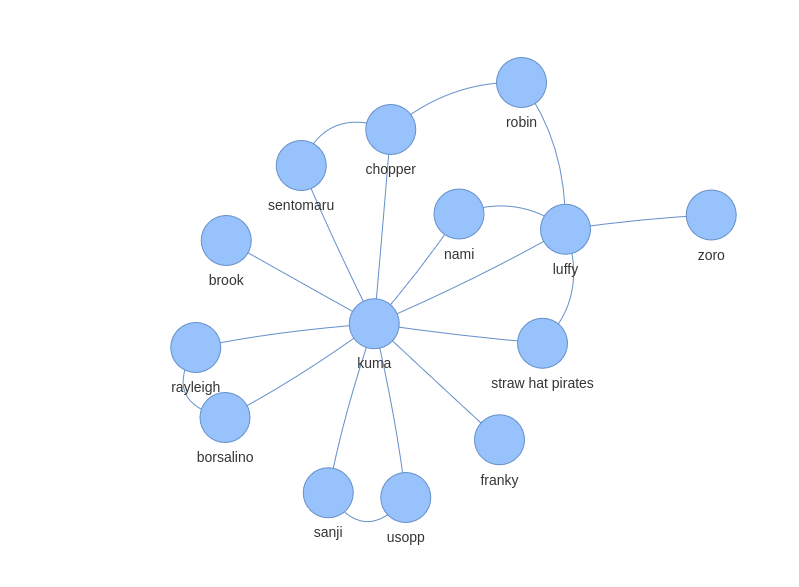

In [13]:
from IPython.display import Image
Image('network_map.png')